# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [135]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [136]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\gmignot\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


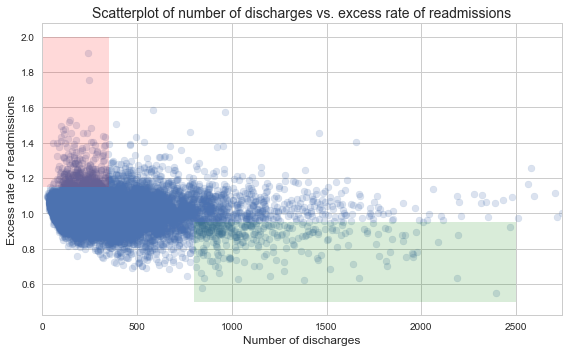

In [137]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [138]:
# Your turn

### A - Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis for the following reasons.<br><br>
First, it is not appropriate to say the rate of readmission is trending down with increasing number of discharges. Indeed, we only have a scatter whith a lot of data form low (<1000) number of discharges and cannot therefore conclude on what is happening above. <br><br> 
No statistical test has been performed to assess the link between these two variables. For example, the correlation could be interesting to assess whether there is a link or not. 
<br>The statistics are given for two sub-groups which do not represent the entire population. Indeed, most of the data seem to lie between 100 an 1000 discharges, but are here-above not considered.<br><br>
Nothing proves there is a significant correlation between discharges and readmissions rate.

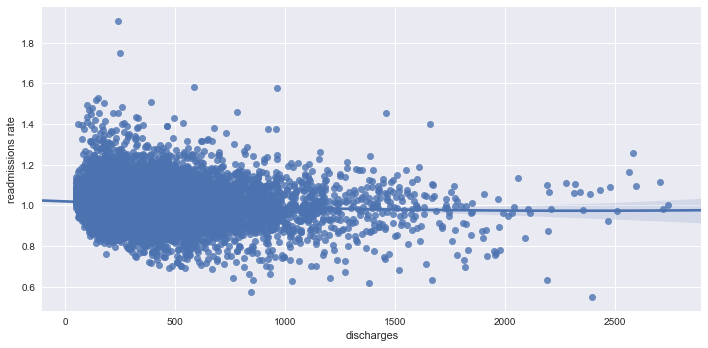

In [151]:
#Can we see a trend ?
import seaborn as sns
from pylab import rcParams

df_from_list = pd.DataFrame({'discharges':x,'readmissions rate':y})
sns.lmplot(x='discharges',y='readmissions rate',data=df_from_list,order=2, size=5, aspect=2)
plt.show()

In [140]:
#Do we have null data ?
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [141]:
print('BEFORE\n',clean_hospital_read_df.isnull().sum())

#dropping footnote
df_1 = clean_hospital_read_df.drop(['Footnote'], axis=1)

print('AFTER\n',df_1.isnull().sum())

BEFORE
 Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64
AFTER
 Hospital Name                  0
Provider Number                0
State                          0
Measure Name                   0
Number of Discharges           0
Excess Readmission Ratio      81
Predicted Readmission Rate    81
Expected Readmission Rate     81
Number of Readmissions        81
Start Date                     0
End Date                       0
dtype: int64


We still have 81 NAN or missing values. We'll get rid of these by dropping NAN. It is not a big deal as we only lose 81/11497 data.

In [142]:
df = df_1.dropna()

In [143]:
print(df.isnull().sum())

Hospital Name                 0
Provider Number               0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64


No more null values. We can now re-plot.

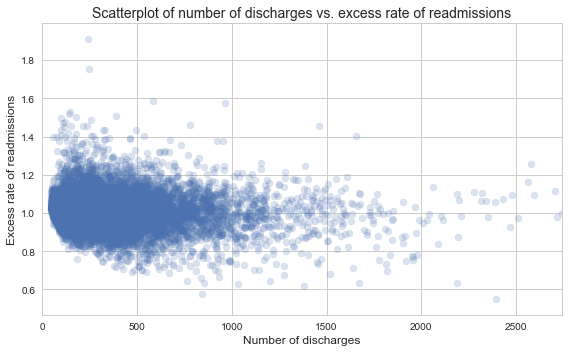

In [144]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions

x = [a for a in df['Number of Discharges'][81:-3]]
y = list(df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### B - Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1 - Setup an appropriate hypothesis test.

H0 - Readmissions rate and number of discharges are correlated <br>
H1 - Readmissions rate and number of discharges are not correlated

Let's create a dataset containing only these features

In [145]:
data = pd.DataFrame({'Number of Discharges':df['Number of Discharges'],'Excess Readmission Ratio':df['Excess Readmission Ratio']})
data = data.reset_index(drop=True)
data

,Excess Readmission Ratio,Number of Discharges
0,1.0914,25
1,1.0961,27
2,1.0934,28
3,1.0908,29
4,1.1123,30
5,1.0992,31
6,1.0847,33
7,1.0738,34
8,1.0720,34
9,1.0651,34


In [146]:
cor = data.corr()
print('Correlation between Readmissions ratio and number of discharges is : ',cor.iloc[0][1])

Correlation between Readmissions ratio and number of discharges is :  -0.0973979435108


Light negative trend for readmissions ratio while discharges number increases !<br>
#### 2 - Compute and report the observed significance value (or p-value).
By looking at the p-value, we want to see the probability of having such a correlation (-0.097) if the variables were unrelated. If it is really low, the null hypothesis (H0) can be rejected (= if really really low probability of seeing this correlation even if variables are unrelated, then the correlation is not significant).
<br> I'll use Pearson's correlation coefficient and associated p-value:

In [147]:
import scipy
from decimal import Decimal

pearson_coeff,p_value = scipy.stats.pearsonr(data['Number of Discharges'],data['Excess Readmission Ratio'])
print('Pearson coefficient of correlation is {:1.6f}, whit a p-value of'.format(pearson_coeff),'%.2E' % Decimal(p_value))

Pearson coefficient of correlation is -0.097398, whit a p-value of 1.22E-25


This low p-value (way below 0.01) tells us that the correlation is highly significant. We can conclude there is a strong link between number of discharges and readmissions rate, even though the slope is really small (it is told by the low correlation coefficient).
#### 3 - Report statistical significance for  α  = .01
As seen above, p-value < 0.01 so it is significant !

#### 4 - Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

We just looked at statistical significance. It shows us the probability of our data beeing distributed as it is by chance. Which here is very low (we have a large dataset).
<br>Practical significance is more real-world realted. Is a decision or action taken based on the observed statistic ? Does it make sense ? For example, we just saw that the correlation, even if weak, is significant. But should we base our decisions on this ?<br>
Here, they highly differ. Indeed, the correlation is so weak that I would not advise to take it into consideration for recommendation to the client. 

#### 5 - Look at the scatterplot above
##### What are the advantages and disadvantages of using this plot to convey information?
There is no clear trendline. Furthermore it could be helpful to have a confidence interval for the linear relationship.

##### Construct another plot that conveys the same information in a more direct manner.

[]

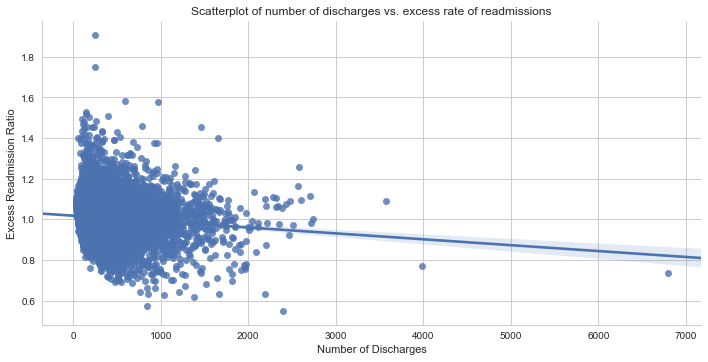

In [152]:
#Here simple lmplot with 95% conf interval
sns.set_style('whitegrid')
sns.lmplot('Number of Discharges','Excess Readmission Ratio',data=data, size=5, aspect=2)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')
plt.plot()
